# INF221 Assignment 2

In [59]:
%matplotlib inline

import math
import random

import matplotlib
import pandas

## Exercise 5
Express the function $\frac{n^3}{1000}-100n^2-100n+3$ in terms of $\Theta$-notation. Find suitable constants $c_1,\:c_2,\:n_0$.

$f(n) = \frac{n^3}{1000}-100n^2-100n+3$

As n grows large, the ${n^3}$ term will start to dominate. So we theorize its runtime may be bounded by

$f(n) = \Theta(n^3)$

If this is true then for $g(n) = c\cdot n^3$ there exists positive constants $c_1, c_2, n_0$ such that $0 < c_1\cdot g(n) < f(n) < c_2\cdot g(n)$ for all $n\geq n_0$

We first check numerically whether this could make sense

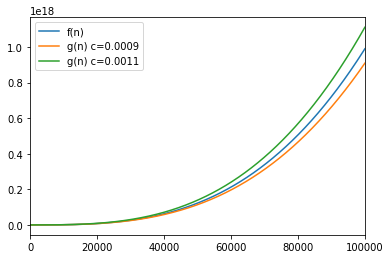

In [69]:
def f(n):
    return ((n**3)/1000) - (100*(n**2)) - (100*n) + 3

def g(n, c):
    return c*(n**3)

step = 100
N = 1e7
c_lower = 1/1100.0
c_upper = 1/900.0
series = {
    'f(n)': list(f(n) for n in range(1, int(N), step)),
    'g(n) c={:.4f}'.format(c_upper): list(g(n, c_upper) for n in range(1, int(N), step)),
    'g(n) c={:.4f}'.format(c_lower): list(g(n, c_lower) for n in range(1, int(N), step)),
}
f = pandas.DataFrame(data=series, index=range(int(N/step)))
f.plot()

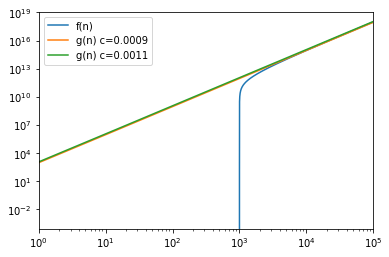

In [68]:
f.plot(logy=True, logx=True)

It does seem like $f(n)$ could be $\Theta(n^3)$. However it is not until around $n > 1000$ that it starts to approach $g(n)$

Evaluating the lower bound symbolically

$$
\begin{align*}
g(n) &\geq f(n) \\
c_1\cdot n^3  &\geq  \frac{n^3}{1000}-100n^2-100n+3 && \text{divide by }n^3 \\
c_1 &\geq \frac{1}{1000}-\frac{100n^2+100n-3}{n^3} && n^3\text{in divisor makes second term approach 0 as n grows} \\
c_1 &\geq \frac{1}{1000} && {n \to \inf} \\
\end{align*}$$

And doing the same for the upper bound

$$
\begin{align*}
g(n) &\leq f(n) \\
c_2\cdot n^3  &\leq  \frac{n^3}{1000}-100n^2-100n+3 && \text{divide by n^3} \\
c_2 &\leq \frac{1}{1000}-\frac{100n^2+100n-3}{n^3} && n^3\text{in divisor makes second term approach 0 as n grows} \\
c_2 &\leq \frac{1}{1000} && {n \to \inf}  \\
\end{align*}$$

We can select an abitrarily large $n_0$ and calculate $c_1, c_2$.

For $n_0=1000000$ the second term is smaller than the constant term and we get $ 1/1000 - \frac{100 n^2 + 100 n - 3}{n^3} ≈ 0.0009 $ and select $c_1 = c_2 = 0.0009$

## Exercise 6
Re-write merge sort (in Python) so that it does not use sentinels, but instead stops once either L or R has had all its elements copied back to A, and then copies the remainder of the other array back to A.

### Original merge sort with sentinel
As a reference, here is a version with sentinels, based on the pseudo-code given in Cormen et.al, Chapter 3.2

In [77]:
def merge_sentinel(arr, start, mid, end):
    # Add Infinity after the data, to always compare less when reading hits end
    left = arr[start:mid+1] + [math.inf]
    right = arr[mid+1:end+1] + [math.inf]
    l = 0
    r = 0
    for a in range(start, end+1):
        if left[l] <= right[r]:
            arr[a] = left[l]
            l += 1
        else:
            arr[a] = right[r]
            r += 1
    
def _merge_sort(arr, start, end, merge):
    if start < end:
        mid = int((start + end) / 2)
        _merge_sort(arr, start, mid, merge)
        _merge_sort(arr, mid+1, end, merge)
        merge(arr, start, mid, end)
    return arr
    
def merge_sort_sentinel(arr):
    return _merge_sort(arr, 0, len(arr)-1, merge_sentinel)
    

def test_sort(sortfunc):
    input = [random.randint(-50, 50) for _ in range(9)]
    expected = sorted(input)
    print(input)
    actual = sortfunc(input.copy())
    assert actual == expected, "\n{} != \n{}".format(actual, expected)
    print(actual)
    print('PASSED')

test_sort(merge_sort_sentinel)

[47, 47, -4, 1, -49, -41, -13, -46, 40]
[-49, -46, -41, -13, -4, 1, 40, 47, 47]
PASSED


### Modified merge sort without sentinel values
Only the merge function differs, rest of the algorithm is the same.

In [84]:
def merge_check_empty(arr, start, mid, end):
    left = arr[start:mid+1]
    right = arr[mid+1:end+1]
    l = 0
    r = 0
    left_length = len(left)
    right_length = len(right)
    for a in range(start, end+1):
        if not l < left_length:
            # left has been exhausted, fill remaining right
            arr[a] = right[r]
            r += 1
        elif not r < right_length:
            # right has been exhausted, fill remaining left
            arr[a] = left[l]
            l += 1
        elif left[l] <= right[r]:
            arr[a] = left[l]
            l += 1
        else:
            arr[a] = right[r]
            r += 1

def merge_sort(arr):
    return _merge_sort(arr, 0, len(arr)-1, merge_check_empty)

test_sort(merge_sort)

[-7, -49, -27, 32, 39, -28, -31, 20, 24]
[-49, -31, -28, -27, -7, 20, 24, 32, 39]
PASSED


This method incurs two extra check for each iteration of the loop, which incurs a performance penalty.
However, the sorting algorithm can now be used with data that cannot be meaningfully compared to `math.inf`

## Excercise 7
Use mathematical induction to show that when $n$ is an exact power of 2, the solution of the recurrence

$$T(n)=\begin{cases} 2 & \text{if}\; n = 2 \\ 2T(n/2)+n &\text{if}\; n = 2^k, \text{for}\; k>1\end{cases}$$

is $T(n)=n\lg n$

In [1]:
# See chapter 4.3 "the substitution method"
# See chapter 4 (master theorem, recursion tree)

## Exercise 8
Show that for any real constants a and b, where $b > 0$, the following holds: $(n+a)^b = \Theta(n^b)$

In [1]:
# TODO: perform on paper
# lower bound and upper bound separately

## Exercise 9

Explain why the statement, "The running time of algorithm A is at least $O(n^2)$" is meaningless.

$O$ (big-O) notation is defined as the asymptotic *upper* bound of the execution time. Thus it does not make sense to claim that the execution time is above ("at least") this.
When making statements about the lower bound, one should instead use $\Omega(n^2)$ for an asymptotically tight bound, or $\omega(n^2)$ for one that is not asymptotically tight.  

## Challenge 1
Cormen et al, Problem 3-2. Fill in the table, provide arguments for your answers.

![Unfilled](problem-3-2-table.png)

In [85]:
# TODO: plot each pair